출처 : https://www.kaggle.com/amritvirsinghx/high-accuracy-cnn-ecg-heartbeat-analysis

In this notebook i want to predict different arrhytmia on ECG.
We have two different dataset,
but i will consider at start only one : mitbih. The MIT-BIH Arrhythmia
Database contains 48 half-hour excerpts of two-channel ambulatory ECG
ecordings, obtained from 47 subjects studied by the BIH Arrhythmia
Laboratory between 1975 and 1979. Twenty-three recordings were chosen at
random from a set of 4000 24-hour ambulatory ECG recordings collected
from a mixed population of inpatients (about 60%) and outpatients
(about 40%) at Boston's Beth Israel Hospital; the remaining 25 recordings
 were selected from the same set to include less common but clinically
 significant arrhythmias that would not be well-represented in a small
 random sample. souces : https://physionet.org/content/mitdb/1.0.0/

Arrhythmia Dataset

Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]


-N : Non-ecotic beats (normal beat)
-S : Supraventricular ectopic beats
-V : Ventricular ectopic beats
-F : Fusion Beats
-Q : Unknown Beats

What is an ecg?

An electrocardiogram (ECG) is a simple test that can be used to check your
heart's rhythm and electrical activity.

Sensors attached to the skin are used to detect the electrical signals
produced by your heart each time it beats.

These signals are recorded by a machine and are looked at by a doctor to
see if they're unusual.

An ECG may be requested by a heart specialist (cardiologist) or any doctor
who thinks you might have a problem with your heart, including your GP.
That's the result of this test we will analyze.

In [11]:

import intelModule.intelModule as imd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

im = imd.intelModule
dfTest = pd.read_csv('./data/mitbih_test.csv', header=None)
dfTrain = pd.read_csv('./data/mitbih_train.csv', header=None)

In [12]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [13]:
dfTest.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [15]:
dfTrain.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
dfTrain.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [17]:
dfTrain.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [18]:
# int 타입으로 캐스팅
dfTrain[187] = dfTrain[187].astype('int')

In [19]:
dfTest[187] = dfTest[187].astype('int')

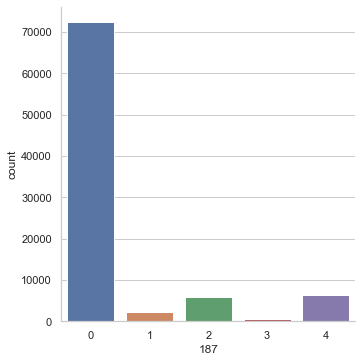

In [21]:
im.snsSetWhite(sns)
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x=187, kind='count', data=dfTrain)

0의 값이 압도적으로 많습니다.

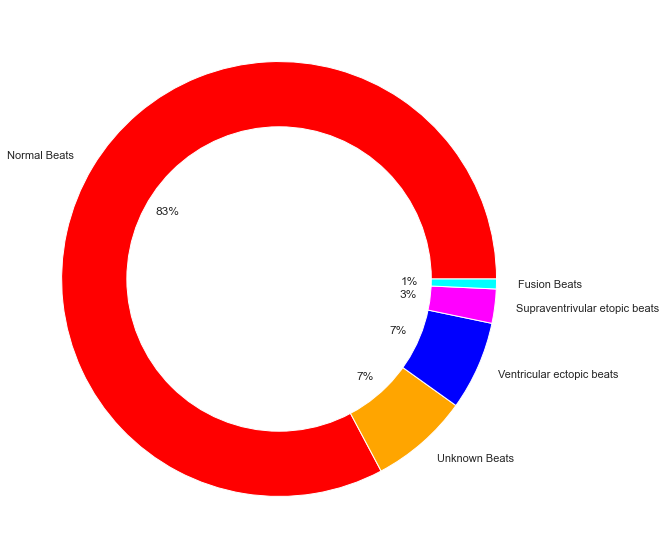

In [22]:
plt.figure(figsize=(10, 10))
myCircle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(dfTrain[187].value_counts(),
        labels=['Normal Beats',
                'Unknown Beats',
                'Ventricular ectopic beats',
                'Supraventrivular etopic beats',
                'Fusion Beats'],
        autopct='%0.0f%%',
        colors=['red', 'orange', 'blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(myCircle)
plt.show()

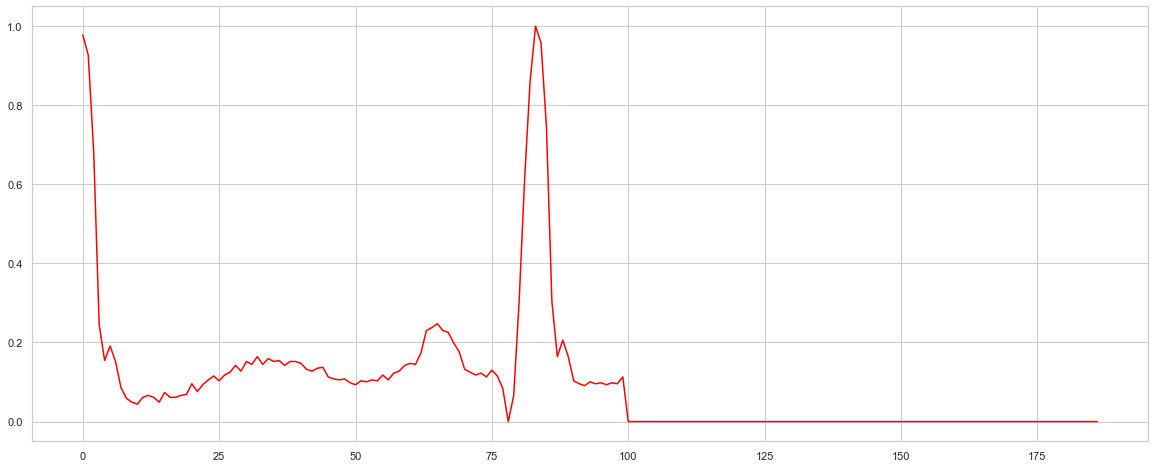

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(dfTrain.iloc[0, 0:187], color='red')
plt.show()

In [24]:
df1 = dfTrain[dfTrain[187] == 1]
df2 = dfTrain[dfTrain[187] == 2]
df3 = dfTrain[dfTrain[187] == 3]
df4 = dfTrain[dfTrain[187] == 4]

일반 심장 박동과 심 실상 이소성 박동의 그래프가 확실히 차이가 난다.

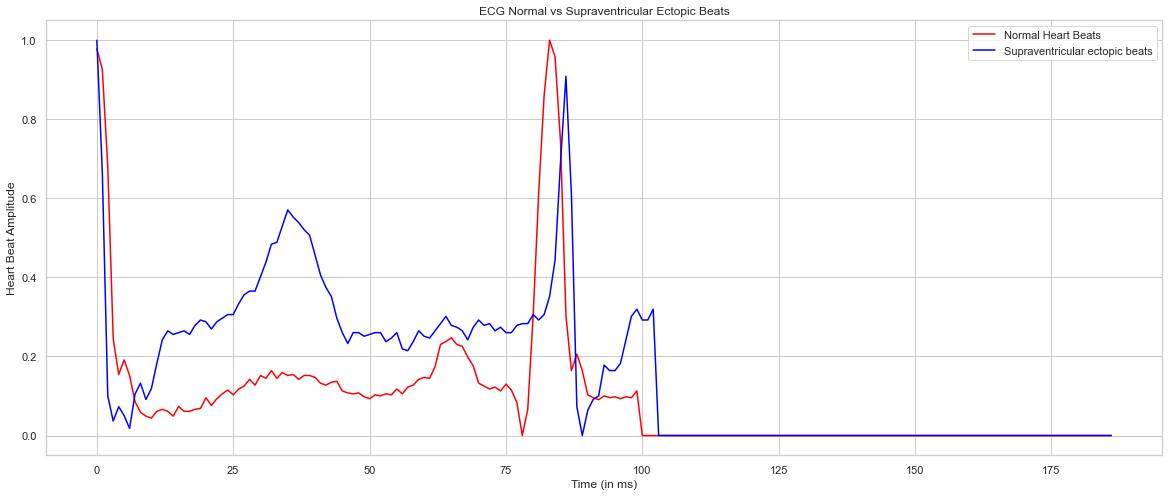

In [25]:
plt.figure(figsize=(20, 8))
plt.plot(dfTrain.iloc[0, 0:187], color='red', label='Normal Heart Beats')
plt.plot(df1.iloc[0, 0:187], color='blue', label='Supraventricular ectopic beats')
plt.title('ECG Normal vs Supraventricular Ectopic Beats', fontsize=12)
plt.xlabel('Time (in ms)')
plt.ylabel('Heart Beat Amplitude')
plt.legend()
plt.show()

심실 이소성 박동도 확연하게 차이남

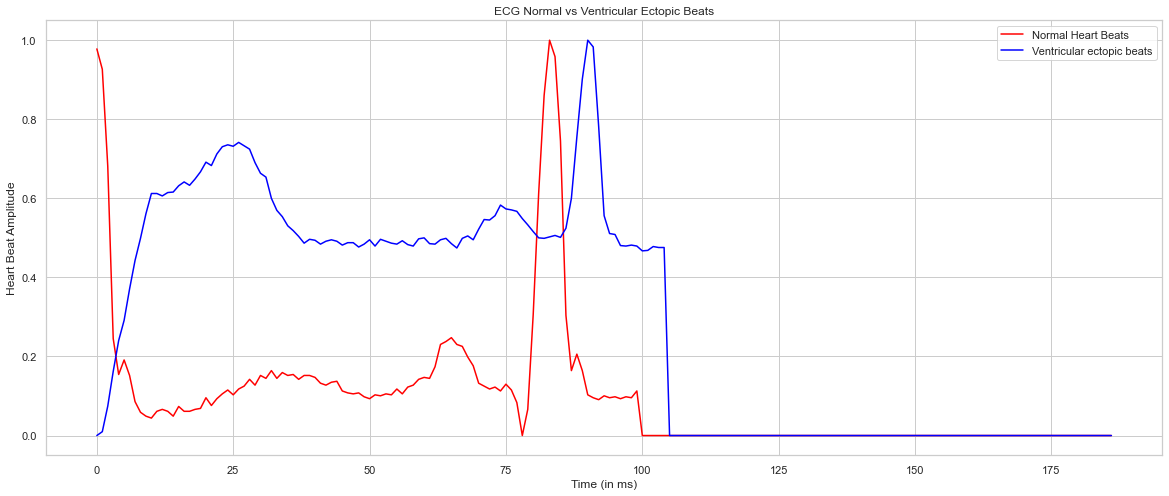

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(dfTrain.iloc[0, 0:187], color='red', label='Normal Heart Beats')
plt.plot(df2.iloc[0, 0:187], color='blue', label='Ventricular ectopic beats')
plt.title('ECG Normal vs Ventricular Ectopic Beats', fontsize=12)
plt.xlabel('Time (in ms)')
plt.ylabel('Heart Beat Amplitude')
plt.legend()
plt.show()


In [30]:
from sklearn.utils import resample

dfOneUpsample = resample(df1, n_samples=20000, replace=True, random_state=123)
dfTwoUpsample = resample(df2, n_samples=20000, replace=True, random_state=123)
dfThreeUpsample = resample(df3, n_samples=20000, replace=True, random_state=123)
dfFourUpsample = resample(df4, n_samples=20000, replace=True, random_state=123)




In [33]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df0 = dfTrain[dfTrain[187] == 0].sample(n=20000, random_state=123)

In [34]:
# merge and all dataframes to create new train samples
dfTrain = pd.concat([df0, dfOneUpsample, dfTwoUpsample, dfThreeUpsample, dfFourUpsample])



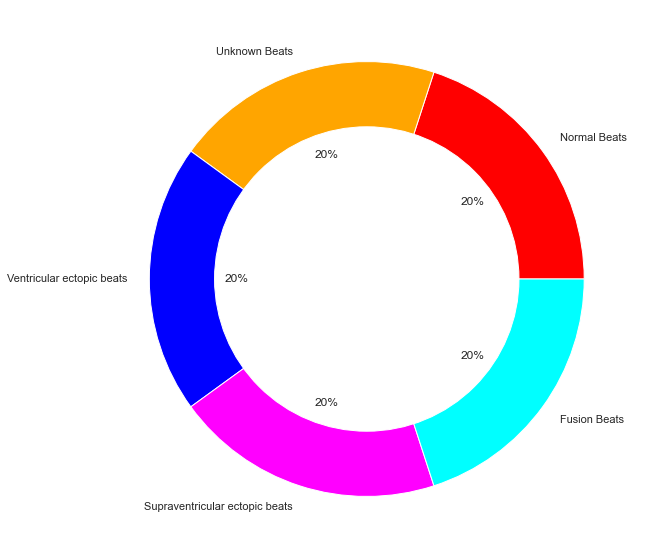

In [35]:
plt.figure(figsize=(10, 10))
myCircle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(dfTrain[187].value_counts(),
        labels=['Normal Beats',
                'Unknown Beats',
                'Ventricular ectopic beats',
                'Supraventricular ectopic beats',
                'Fusion Beats'],
        autopct='%0.0f%%',
        colors=['red', 'orange', 'blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(myCircle)
plt.show()



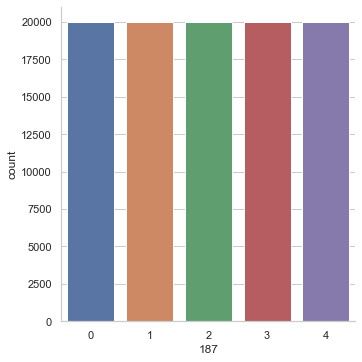

In [36]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x=187, kind='count', data=dfTrain)


In [37]:
# target Y
targetTrain = dfTrain[187]
targetTest = dfTest[187]



In [38]:
targetTrain.unique()

array([0, 1, 2, 3, 4])

In [39]:
#This is not good for classification, we always convert them into catagorical one hot encoding
# convert integer values into categorical one hot encoding
# Class 1 - [0,1,0,0,0]
# Class 4 - [0,0,0,0,1]

from keras.utils.np_utils import to_categorical

yTrain = to_categorical(targetTrain)
yTest = to_categorical(targetTest)

xTrain = dfTrain.iloc[:, :-1].values
xTest = dfTest.iloc[:, :-1].values

# This will work good with ANN Classification

In [40]:
# this data is in single dimension, 1D (no of samples, features)
xTrain.shape

(100000, 187)

In [41]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
xTrain = xTrain.reshape(len(xTrain), xTrain.shape[1], 1)
xTest = xTest.reshape(len(xTest), xTest.shape[1], 1)



In [42]:
xTrain.shape

(100000, 187, 1)

#CNN - Conv1D

In [43]:
from keras.models import Sequential
from keras.layers import Dense  # for fully conneted layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from keras.layers.normalization import BatchNormalization


In [44]:
def buildModel():
    model = Sequential()

    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    model.add(
        Conv1D(
            filters=64,
            kernel_size=6,
            activation='relu',
            padding='same',
            input_shape=(187, 1)))
     #we pass individual values hence not 100000,187,1

    # Normalization to avoid overfitting
    model.add(BatchNormalization())

    # Pooling
    model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=(2), padding='same'))

    # Flatten
    model.add(Flatten())

    # Fully connected layer
    # input layer
    model.add(Dense(units=64, activation='relu'))

    # Hidden layer
    model.add(Dense(units=64, activation='relu'))

    # Output layer
    model.add(Dense(units=5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [45]:
model = buildModel()


In [46]:
# This is for one sample, i.e. one row
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 187, 64)           448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_5 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 47, 64)           

In [47]:
history = model.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))

Train on 100000 samples, validate on 21892 samples
Epoch 1/15
100000/100000 [==============================] - 413s 4ms/step - loss: 0.1782 - accuracy: 0.9355 - val_loss: 0.1631 - val_accuracy: 0.9485

KeyboardInterrupt: 

Accuracy of the model comes out to be 0.9975!

In [ ]:
# evaluate ECG Test Data
model.evaluate(xTest, yTest)

In [ ]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
# Make Prediction
predict = model.predict(xTest)

In [ ]:
# Predicted o/p will be in probability distribution
predict

In [ ]:
# distributional probability to integers
yhat = np.argmax(predict, axis=1)

Checking the confusion matrix and classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(yTest, axis=1), yhat)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(np.argmax(yTest, axis=1), yhat),
    annot=True,
    fmt = '0.0f',
    cmap = 'RdPu'
)

In [ ]:
print(classification_report(np.argmax(yTest, axis=1), yhat))